In [1]:
## Initial setup
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService

import os
from dotenv import load_dotenv

load_dotenv()
API_TOKEN = os.getenv("API_TOKEN")
service = QiskitRuntimeService(channel="ibm_quantum", token=API_TOKEN)
backend = service.backend(name="ibm_rensselaer")

### Testing Const/Balance for 1-bit Functions

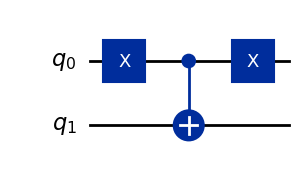

In [ ]:
# f_bal(x) = NOT(x)
Uf_bal = qiskit.QuantumCircuit(2)
Uf_bal.x(0)
Uf_bal.cx(0, 1)
Uf_bal.x(0)
Uf_bal_gate = Uf_bal.to_gate()
Uf_bal.draw(output='mpl')

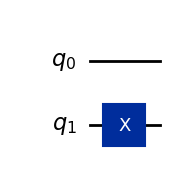

In [7]:
# f_const(x) = 1
Uf_const = qiskit.QuantumCircuit(2)
Uf_const.x(1)
Uf_const_gate = Uf_const.to_gate()
Uf_const.draw(output='mpl')

In [21]:
def check_balance_circuit(Uf):
    # 2 qubits and 1 classical bit to measure the top qubit at the end
    qc = qiskit.QuantumCircuit(2, 1)
    qc.initialize("00")
    # initial state (entagle)
    qc.h(0)
    qc.x(1)
    qc.h(1)
    # run the Uf
    qc.append(Uf, [0, 1])
    # detangle and measure
    qc.h([0, 1])
    qc.measure([0], [0])
    return qc

def check_balance_results(Uf):
    qc = check_balance_circuit(Uf)
    qc = qiskit.transpile(qc, backend)
    job = backend.run(qc, shots=10**4)
    result = job.result()
    counts = result.get_counts(qc)
    return counts

In [22]:
counts_bal = check_balance_results(Uf_bal_gate)
counts_const = check_balance_results(Uf_const_gate)

/tmp/ipykernel_59629/1526369375.py:19: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(qc, shots=10**4)
/tmp/ipykernel_59629/1526369375.py:19: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(qc, shots=10**4)


In [23]:
print(counts_bal)
print(counts_const)

{'1': 9881, '0': 119}
{'0': 9997, '1': 3}
